In [ ]:
# selenium 라이브러리를 설치합니다.
!pip install selenium
# webdriver-manager 라이브러리 설치
!pip install webdriver-manager

# 필요한 모듈들을 임포트합니다.
import pandas as pd
from IPython import get_ipython
from IPython.display import display
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import time
from collections import Counter
import re
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService  # Service를 올바르게 임포트
import os
from openpyxl import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 18.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Google Chrome 및 ChromeDriver 설치를 위한 명령어들입니다.
!apt-get update
!apt-get install -y google-chrome-stable
!whereis google-chrome
!pip install webdriver-manager

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.5 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,859 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe

In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 20.1 MB/s eta 0:00:00


In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 124565 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# Import matplotlib and matplotlib.pyplot
import matplotlib
import matplotlib.pyplot as plt

# Configure the font family to 'NanumGothic' and then to 'NanumBarunGothic'
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

- 미숙아 연하곤란

In [ ]:
import urllib.request

'미숙아 연하곤란'에 대한 네이버 블로그 검색 중...
총 301개의 블로그 글이 수집되었습니다.
데이터 저장 완료: 미숙아 연하곤란_블로그.csv
키워드 분석 결과:
아동: 93
간호: 67
간호학: 63
정리: 42
간호조무사: 40
신생아: 34
미숙아: 28
시험: 25
위험: 24
증상: 23
모의고사: 20
영양: 19
폐렴: 18
재활: 18
문제: 17
흡인: 15
장애: 15
노트: 14
요점: 13
및: 13


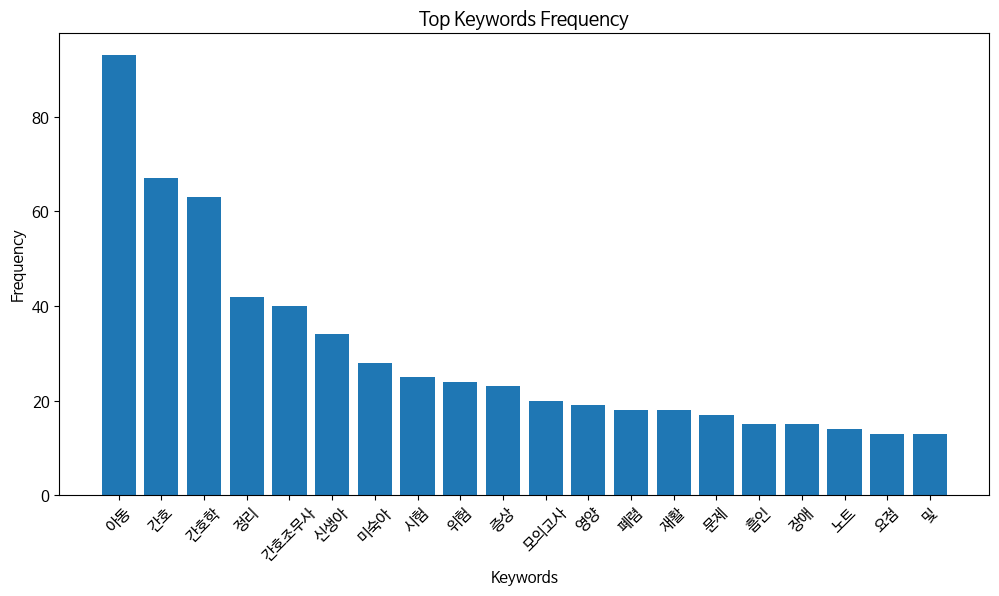

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 블로그 크롤링 함수
def naver_blog_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/blog.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['postdate'], '%Y%m%d')  # 블로그는 postdate를 사용
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'postDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 연하곤란"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 블로그 검색 중...")
    blog_data = naver_blog_crawler(keyword, start_date, end_date)
    print(f"총 {len(blog_data)}개의 블로그 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    blog_df = pd.DataFrame(blog_data)
    blog_df.to_csv('미숙아 연하곤란_블로그.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 연하곤란_블로그.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(blog_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 삼킴문제

'미숙아 삼킴문제'에 대한 네이버 블로그 검색 중...
총 138개의 블로그 글이 수집되었습니다.
데이터 저장 완료: 미숙아 삼킴문제_블로그.csv
키워드 분석 결과:
신생아: 28
아동: 26
간호: 21
뇌성마비: 21
정리: 18
간호학: 16
영양: 15
치료: 15
재활: 13
소아: 12
증상: 12
원인: 11
건강: 9
간호조무사: 9
질환: 8
및: 8
병원: 8
위: 7
수유: 7
미숙아: 7


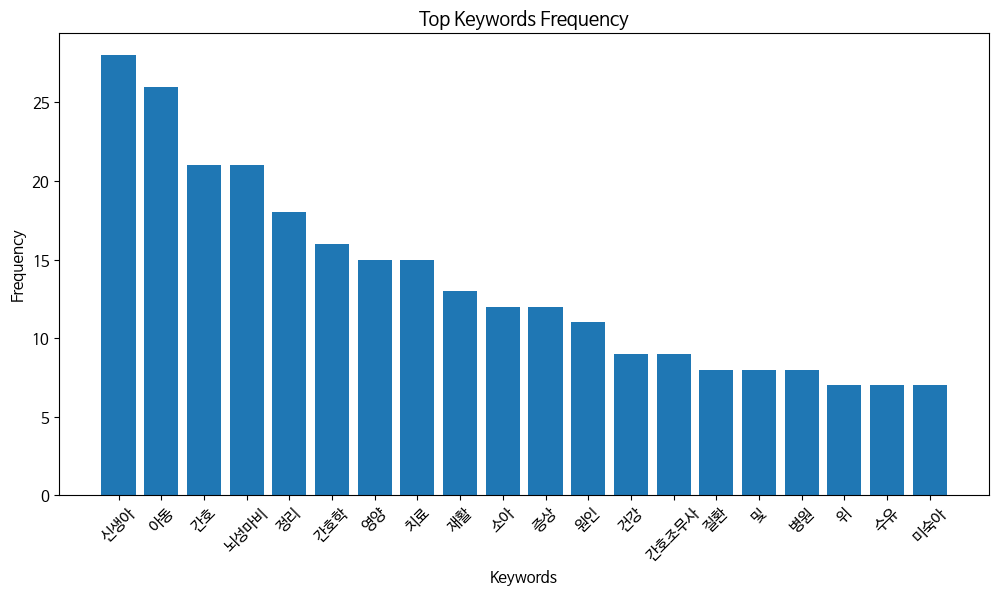

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 블로그 크롤링 함수
def naver_blog_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/blog.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['postdate'], '%Y%m%d')  # 블로그는 postdate를 사용
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'postDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 삼킴문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 블로그 검색 중...")
    blog_data = naver_blog_crawler(keyword, start_date, end_date)
    print(f"총 {len(blog_data)}개의 블로그 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    blog_df = pd.DataFrame(blog_data)
    blog_df.to_csv('미숙아 삼킴문제_블로그.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 삼킴문제_블로그.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(blog_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 모유수유 문제

'미숙아 모유수유 문제'에 대한 네이버 블로그 검색 중...
총 949개의 블로그 글이 수집되었습니다.
데이터 저장 완료: 미숙아 모유수유 문제_블로그.csv
키워드 분석 결과:
수술: 189
신생아: 160
낙태: 130
약물: 127
임신중절: 103
황달: 97
중절: 88
절: 77
방법: 72
비용: 67
초기: 65
원인: 62
임신: 58
아기: 58
증상: 54
미숙아: 53
합법: 52
후기: 50
정리: 50
관리: 43


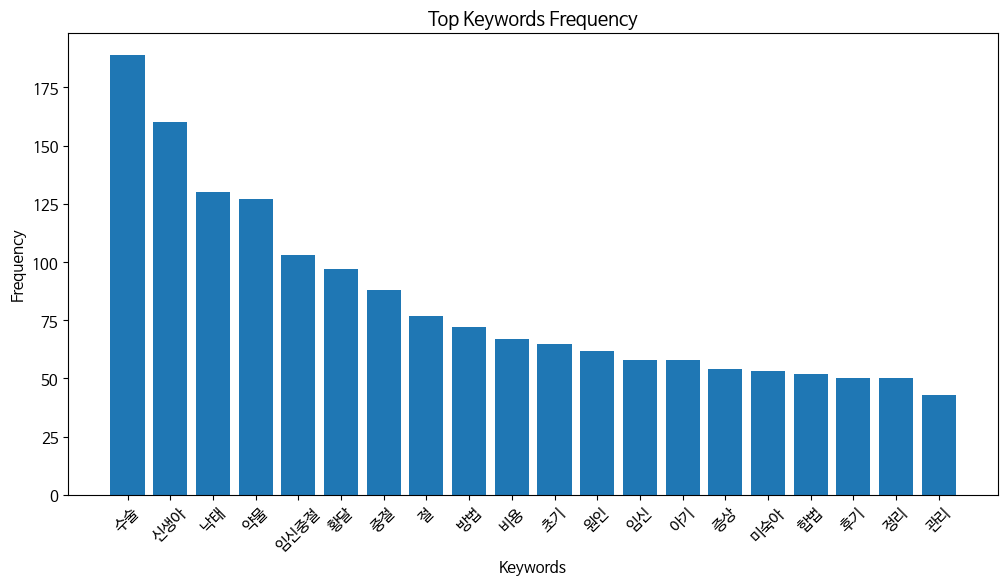

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 블로그 크롤링 함수
def naver_blog_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/blog.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['postdate'], '%Y%m%d')  # 블로그는 postdate를 사용
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'postDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 모유수유 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 블로그 검색 중...")
    blog_data = naver_blog_crawler(keyword, start_date, end_date)
    print(f"총 {len(blog_data)}개의 블로그 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    blog_df = pd.DataFrame(blog_data)
    blog_df.to_csv('미숙아 모유수유 문제_블로그.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 모유수유 문제_블로그.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(blog_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 수유 어려움

'미숙아 수유 어려움'에 대한 네이버 블로그 검색 중...
총 980개의 블로그 글이 수집되었습니다.
데이터 저장 완료: 미숙아 수유 어려움_블로그.csv
키워드 분석 결과:
신생아: 209
수유: 115
아동: 114
모유: 107
아기: 92
간호학: 86
미숙아: 74
증상: 68
방법: 68
황달: 64
건강: 58
출산: 57
및: 56
간호: 54
분유: 53
원인: 52
정리: 49
치료: 49
임신: 44
지원: 44


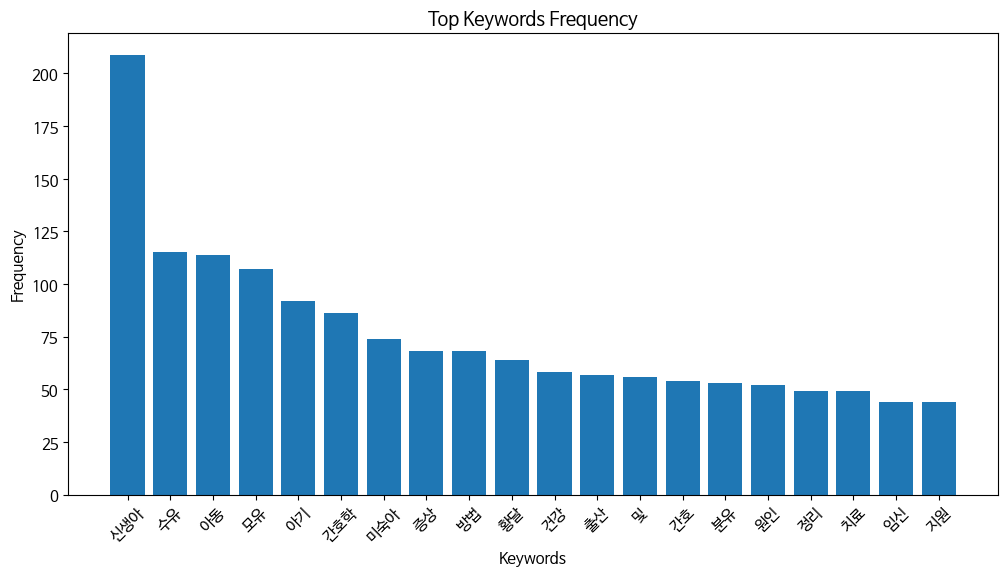

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 블로그 크롤링 함수
def naver_blog_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/blog.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['postdate'], '%Y%m%d')  # 블로그는 postdate를 사용
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'postDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 수유 어려움"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 블로그 검색 중...")
    blog_data = naver_blog_crawler(keyword, start_date, end_date)
    print(f"총 {len(blog_data)}개의 블로그 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    blog_df = pd.DataFrame(blog_data)
    blog_df.to_csv('미숙아 수유 어려움_블로그.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 수유 어려움_블로그.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(blog_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 빨기 문제

'미숙아 빨기 문제'에 대한 네이버 블로그 검색 중...
총 428개의 블로그 글이 수집되었습니다.
데이터 저장 완료: 미숙아 빨기 문제_블로그.csv
키워드 분석 결과:
신생아: 92
쪽쪽이: 79
아동: 73
젖꼭지: 63
발달: 54
간호: 50
공갈: 47
간호학: 44
아기: 41
미숙아: 33
아이: 33
때: 32
정리: 30
이용: 27
둥이: 26
문제: 24
육아: 24
주: 23
간호조무사: 23
모유수유: 23


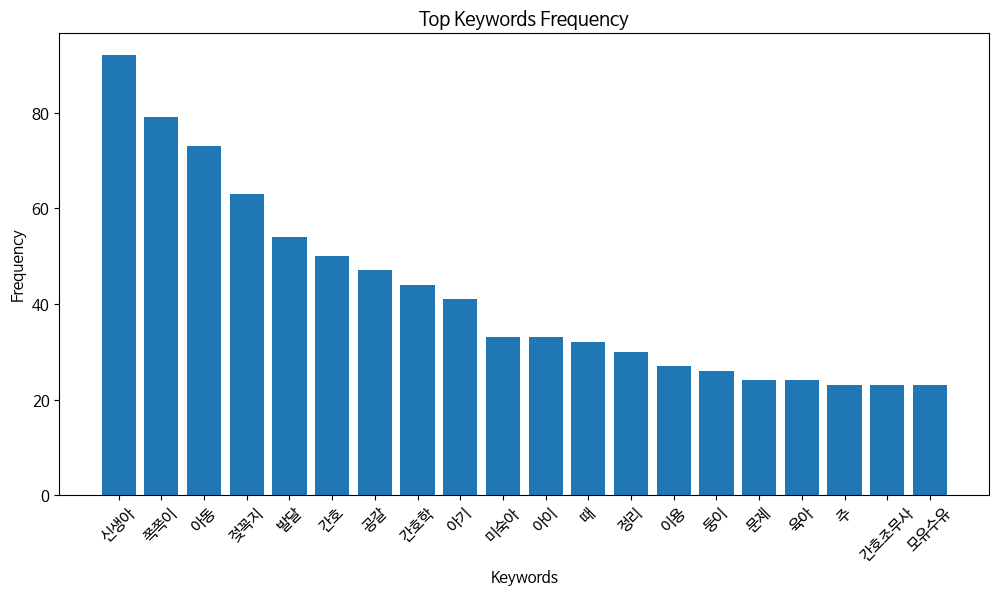

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 블로그 크롤링 함수
def naver_blog_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/blog.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['postdate'], '%Y%m%d')  # 블로그는 postdate를 사용
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'postDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 빨기 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 블로그 검색 중...")
    blog_data = naver_blog_crawler(keyword, start_date, end_date)
    print(f"총 {len(blog_data)}개의 블로그 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    blog_df = pd.DataFrame(blog_data)
    blog_df.to_csv('미숙아 빨기 문제_블로그.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 빨기 문제_블로그.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(blog_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

# 전처리 진행

- 미숙아 연하곤란

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/naver_blog/미숙아 연하곤란_블로그.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['postDate'] = pd.to_datetime(data['postDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 연하곤란.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                            title  \
0         ［보건임용］아동, 성인, 모성간호 징후&amp;증후군 정리 / 파일공유   
1                                            호흡기계   
2                              예방치학 예방치과학 기말고사 대비   
3  소아과총론 - <b>미숙아</b>, 저체중 출생아 간호, 분만 손상(두개손상...    
4                뇌성마비(cerebral palsy, CP)에 대하여 2.   

                                                link    postDate  \
0      https://blog.naver.com/susu1024_/223697854183  2024-12-19   
1    https://blog.naver.com/harry_0418_/223691088863  2024-12-12   
2  https://blog.naver.com/anyway_evangelism/22368...  2024-12-08   
3    https://blog.naver.com/raphaellacs/223675623901  2024-11-28   
4  https://blog.naver.com/growingcenter/223674449542  2024-11-27   

                                         description  
0  호흡<b>곤란</b>을 나타내는 질환 (34주미만의 <b>미숙아</b>, 당뇨병 모...  
1  <b>연하</b>통, <b>연하곤란</b>, 발열 (모든 연령층에 발생, 급성/만성...  
2  치은<b>연하</b> &lt;- 치면에 부착하는 세균 (사상균, 구균, 간균) 백악...  
3  미만(<b>연하</b>반사 불완전), 출생체중 &lt; 1,500g(호흡,

<ipython-input-42-beb88d0d577e>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-42-beb88d0d577e>:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


- 미숙아 삼킴 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/naver_blog/미숙아 삼킴문제_블로그.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['postDate'] = pd.to_datetime(data['postDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 삼킴문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                           title  \
0  (아동 간호 <b>문제</b>은행) 고위험 신생아 간호 134~168 키워드 정리   
1               서평 - 뇌성마비 장애인과 가족들을 위한 건강보건 길라잡이   
2               메모 - 뇌성마비 장애인과 가족들을 위한 건강보건 길라잡이   
3            겨울철 우리 아이의 감기, 호흡기세포융합바이러스(RSV)일까요?   
4          소아 물리치료(Intro. of Normal development)   

                                               link    postDate  \
0     https://blog.naver.com/4060story/223693807452  2024-12-15   
1   https://blog.naver.com/wkfajrsmsek/223691273478  2024-12-12   
2   https://blog.naver.com/wkfajrsmsek/223691261127  2024-12-12   
3  https://blog.naver.com/kmsungae0112/223671216567  2024-11-24   
4  https://blog.naver.com/hj-brandofme/223670536709  2024-11-23   

                                         description  
0  154 -<b>미숙아</b> 보육기 간호 : <b>삼킴</b> 반사 미숙으로 흡인 ...  
1  경우, <b>삼킴</b>이 어려운 경우), 언어/인지 저하, 시력/청력 저하, 뼈의...  
2  인해 <b>삼킴</b> 기능이 함께 저하되기도 합니다. - 47p 뇌성마비 아동과 ...  
3  -<b>미숙아</b> -6개월 이하의 영아 -선천성 심장질환을 가진 2세 미만 소아...  
4

<ipython-input-43-a53108a78d05>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


- 미숙아 모유수유 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/naver_blog/미숙아 모유수유 문제_블로그.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['postDate'] = pd.to_datetime(data['postDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 모유수유 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                title                                          link  \
0        낙태 합법화 찬성 반대  https://blog.naver.com/medi1988/223710305315   
1    산부인과 낙태 비용 고민한다면   https://blog.naver.com/hno2019/223710291033   
2  산부인과 낙태 비용 고민되는 이유  https://blog.naver.com/dyddnejd/223709252064   
3           합법적 낙태 참고  https://blog.naver.com/dyddnejd/223709249583   
4        낙태 합법화 찬성 점검  https://blog.naver.com/dyddnejd/223709233551   

     postDate                                        description  
0  2024-12-31  <b>미숙아</b> 수술이 이틀에서 사흘 정도 늦어졌어요. 불규칙한 임신의 경우 임...  
1  2024-12-31  <b>미숙아</b> 수술이 2~3일 연기된 사례도 있었습니다. 불규칙한 임신은 임신...  
2  2024-12-30  <b>미숙아</b> 수술이 2~3일 연기되었던 사례도 있었어요. 불규칙한 임신은 임...  
3  2024-12-30  <b>미숙아</b> 수술은 2~3일 지연되었고, 불규칙한 임신의 경우에는 3년차까지...  
4  2024-12-30  <b>미숙아</b> 수술이 이틀에서 사흘 정도 지연되었어요. 불규칙한 임신의 경우 ...  


<ipython-input-44-4fa931f55b11>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


전처리 후 데이터 샘플:
                title                                          link  \
0        낙태 합법화 찬성 반대  https://blog.naver.com/medi1988/223710305315   
1    산부인과 낙태 비용 고민한다면   https://blog.naver.com/hno2019/223710291033   
2  산부인과 낙태 비용 고민되는 이유  https://blog.naver.com/dyddnejd/223709252064   
3           합법적 낙태 참고  https://blog.naver.com/dyddnejd/223709249583   
4        낙태 합법화 찬성 점검  https://blog.naver.com/dyddnejd/223709233551   

    postDate                                        description  
0 2024-12-31  미숙아 수술이 이틀에서 사흘 정도 늦어졌어요. 불규칙한 임신의 경우 임신 3년차까지...  
1 2024-12-31  미숙아 수술이 2~3일 연기된 사례도 있었습니다. 불규칙한 임신은 임신 3년차까지 ...  
2 2024-12-30  미숙아 수술이 2~3일 연기되었던 사례도 있었어요. 불규칙한 임신은 임신 3년차까지...  
3 2024-12-30  미숙아 수술은 2~3일 지연되었고, 불규칙한 임신의 경우에는 3년차까지 지속적으로 ...  
4 2024-12-30  미숙아 수술이 이틀에서 사흘 정도 지연되었어요. 불규칙한 임신의 경우 임신 3년 차...  
전처리 완료. 파일 저장됨.


- 미숙아 수유 어려움

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/naver_blog/미숙아 수유 어려움_블로그.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['postDate'] = pd.to_datetime(data['postDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 수유 어려움.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                              title  \
0                      낙태 합법화 찬성 반대   
1          이유식, 언제 시작해야 아기에게 딱 좋을까?   
2                         합법적 낙태 참고   
3                      낙태 합법화 찬성 점검   
4  김포산부인과 추천 임신과 출산을 준비하기 위한 나리여성병원   

                                               link    postDate  \
0      https://blog.naver.com/medi1988/223710305315  2024-12-31   
1  https://blog.naver.com/drleestrivia/223709683209  2024-12-30   
2      https://blog.naver.com/dyddnejd/223709249583  2024-12-30   
3      https://blog.naver.com/dyddnejd/223709233551  2024-12-30   
4     https://blog.naver.com/bull11695/223708888783  2024-12-30   

                                         description  
0  가지 <b>어려움</b>을 겪는 경우가 있습니다. 낙태 후 회복 과정도 중요한 주제...  
1  이유 ＊ <b>미숙아</b>의 이유식 시작 시점 이유식 시작 시기의 정확한 기준 만...  
2  <b>미숙아</b> 수술은 2~3일 지연되었고, 불규칙한 임신의 경우에는 3년차까지...  
3  다양한 <b>어려움</b>을 겪는 경우가 있습니다. 중절 후의 회복 과정 역시 중요...  
4  스트레스를 우울증 효과가 캥거루 케어는 <b>미숙아</b>: 산부인과 <b>미숙아<...  


<ipython-input-45-7049e3acb3a9>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-45-7049e3acb3a9>:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


전처리 후 데이터 샘플:
                              title  \
0                      낙태 합법화 찬성 반대   
1          이유식, 언제 시작해야 아기에게 딱 좋을까?   
2                         합법적 낙태 참고   
3                      낙태 합법화 찬성 점검   
4  김포산부인과 추천 임신과 출산을 준비하기 위한 나리여성병원   

                                               link   postDate  \
0      https://blog.naver.com/medi1988/223710305315 2024-12-31   
1  https://blog.naver.com/drleestrivia/223709683209 2024-12-30   
2      https://blog.naver.com/dyddnejd/223709249583 2024-12-30   
3      https://blog.naver.com/dyddnejd/223709233551 2024-12-30   
4     https://blog.naver.com/bull11695/223708888783 2024-12-30   

                                         description  
0  가지 어려움을 겪는 경우가 있습니다. 낙태 후 회복 과정도 중요한 주제이며, 이를 ...  
1  이유 ＊ 미숙아의 이유식 시작 시점 이유식 시작 시기의 정확한 기준 만 6개월은 이...  
2  미숙아 수술은 2~3일 지연되었고, 불규칙한 임신의 경우에는 3년차까지 지속적으로 ...  
3  다양한 어려움을 겪는 경우가 있습니다. 중절 후의 회복 과정 역시 중요한 주제이며,...  
4  스트레스를 우울증 효과가 캥거루 케어는 미숙아: 산부인과 미숙아는 일반적으로 발생 ...  
전처리 완료. 파일 저장됨.


- 미숙아 빨기 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/naver_blog/미숙아 빨기 문제_블로그.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['postDate'] = pd.to_datetime(data['postDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 빨기 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                            title  \
0       (아동 간호 <b>문제</b>은행) 신생아 간호 021~133 키워드 정리   
1            4. 이른둥이 생후 60 ~ 90일 일지 (교정일 1 ~ 31일)   
2               [독서 노트] 잘 자고 잘 먹는 아기의 시간표 - 내용 정리   
3  소아과총론 - <b>미숙아</b>, 저체중 출생아 간호, 분만 손상(두개손상...    
4                  신생아 사래 모유 수유 사출 분유 수유 사래 대처 방법   

                                              link    postDate  \
0    https://blog.naver.com/4060story/223687904510  2024-12-09   
1      https://blog.naver.com/knowu90/223687700042  2024-12-09   
2   https://blog.naver.com/6yooknyong/223678662125  2024-12-01   
3  https://blog.naver.com/raphaellacs/223675623901  2024-11-28   
4   https://blog.naver.com/seojinyuju/223665325894  2024-11-18   

                                         description  
0  저체중출산이나 <b>미숙아</b>는 광선요법 : 광선요법 시 눈의 보호를 위해 안대...  
1  -사출 <b>문제</b>도 있었음..(엄마도 엄마가 처음이라 미아내 ㅠㅠ) -더블하...  
2  기본에 <b>문제</b>가 있다면 그에 대한 대응 매뉴얼이 되어준다. 제 1장 잘자...  
3  (호흡,<b>빨기</b> 미숙) 3) 총정맥영양(TPN) : 28주 미만, 출생체중...  
4

<ipython-input-46-92384b0dbb43>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-46-92384b0dbb43>:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


# 시각화

In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

Processing: 전처리된_미숙아 빨기 문제.csv


<ipython-input-49-959065b9f1e0>:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-49-959065b9f1e0>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 수유 어려움.csv


<ipython-input-49-959065b9f1e0>:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-49-959065b9f1e0>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 연하곤란.csv


<ipython-input-49-959065b9f1e0>:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-49-959065b9f1e0>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 모유수유 문제.csv


<ipython-input-49-959065b9f1e0>:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-49-959065b9f1e0>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-49-959065b9f1e0>:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-49-959065b9f1e0>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Generating Word Cloud...


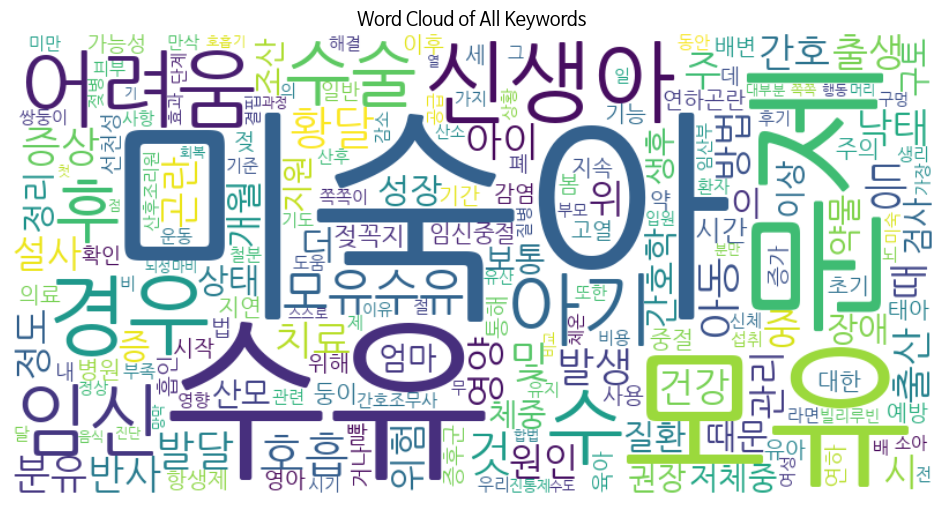

Keyword Correlation Analysis...
Keyword Trend Analysis...


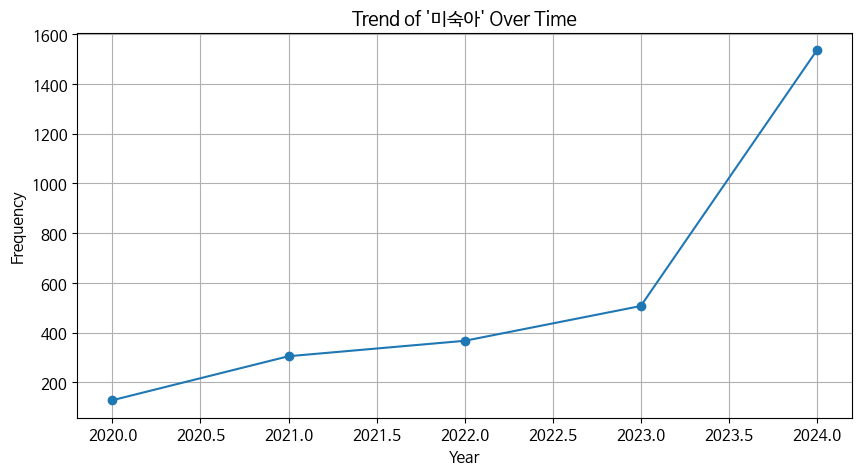

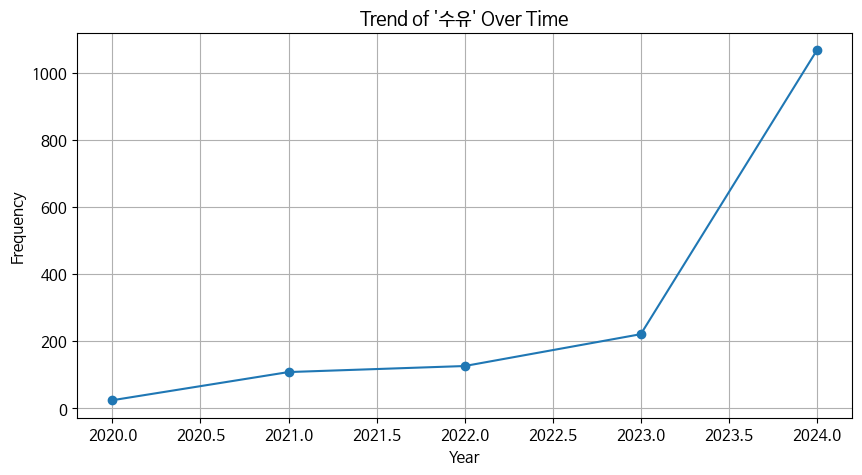

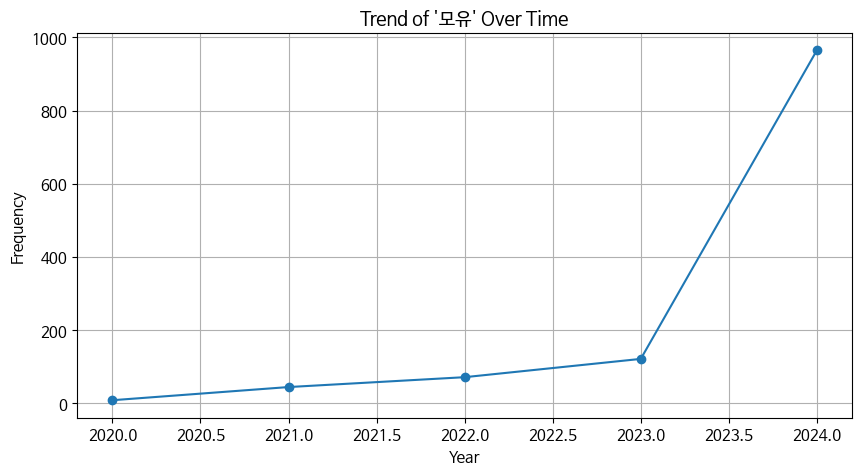

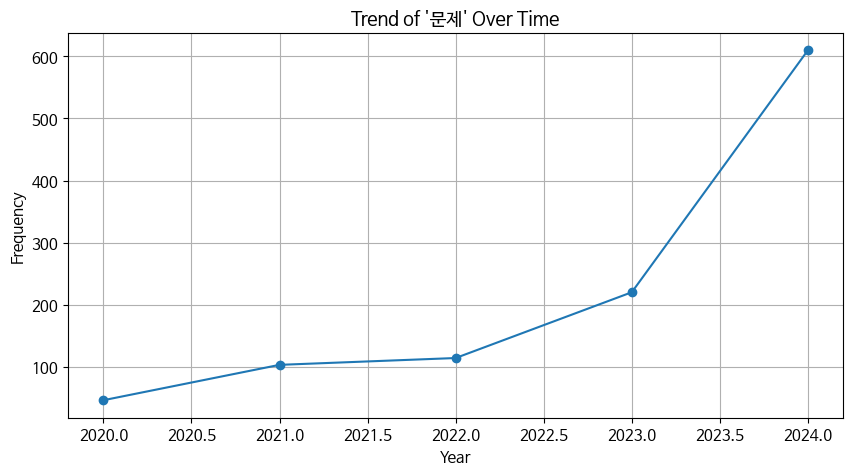

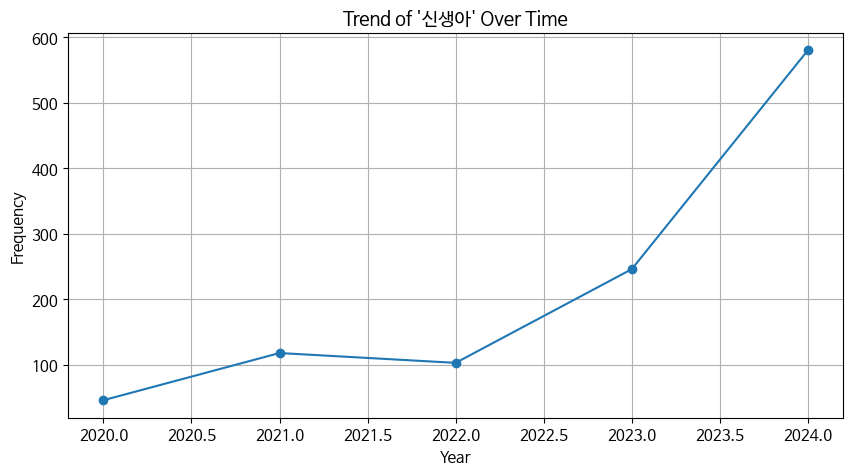

Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/naver_blog/pre_blog"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['postDate'] = pd.to_datetime(data['postDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'postDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        all_keywords.extend(tokens)

        # 연도별 키워드 추출
        trend_data.append({'year': row['postDate'].year, 'keywords': tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 파일 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석 (빈도 기반)
print("Keyword Correlation Analysis...")
from itertools import combinations
from collections import defaultdict

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

# 시기별 키워드 트렌드 분석
print("Keyword Trend Analysis...")
trend_df = pd.DataFrame(trend_data)
trend_df = trend_df.explode('keywords')
trend_trends = trend_df.groupby(['year', 'keywords']).size().reset_index(name='frequency')

# 시기별 키워드 변화 시각화
for keyword in word_counts.most_common(5):
    keyword_name = keyword[0]
    keyword_trend = trend_trends[trend_trends['keywords'] == keyword_name]

    plt.figure(figsize=(10, 5))
    plt.plot(keyword_trend['year'], keyword_trend['frequency'], marker='o')
    plt.title(f"Trend of '{keyword_name}' Over Time")
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

print("Analysis Complete.")

# 불용어 처리 단계

- 워드 클라우드

Processing: 전처리된_미숙아 연하곤란.csv


<ipython-input-11-bda6d83f169b>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-bda6d83f169b>:61: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 수유 어려움.csv


<ipython-input-11-bda6d83f169b>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-bda6d83f169b>:61: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-11-bda6d83f169b>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-bda6d83f169b>:61: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 모유수유 문제.csv


<ipython-input-11-bda6d83f169b>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-bda6d83f169b>:61: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv


<ipython-input-11-bda6d83f169b>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-bda6d83f169b>:61: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Generating Word Cloud...


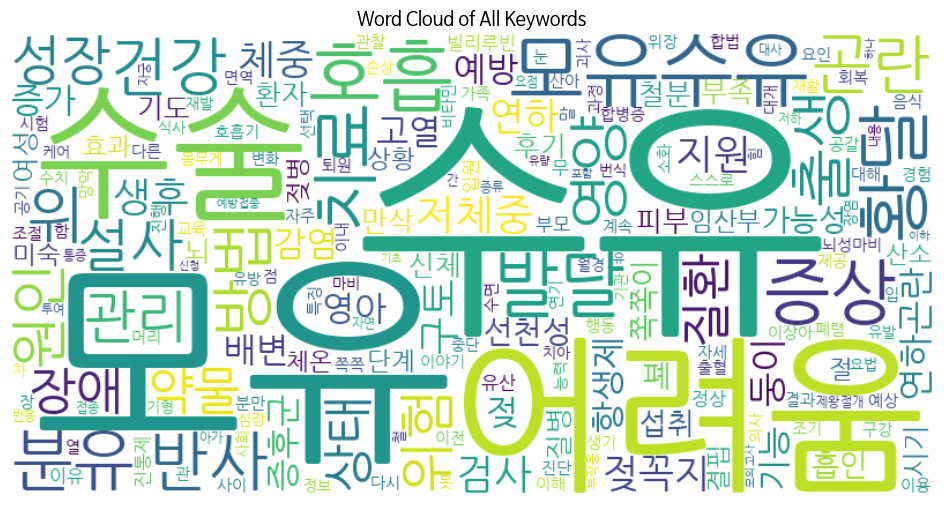

Keyword Correlation Analysis...
Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유","삼킴","연하 곤란","장애", "문제", "빨기", "수유", "구강","빠는 힘"]

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘','기','달',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가',
    '계','달','수도','주','비'
]

remove_words = [
    '미만','해결','이후','간호','임신','경우','소아','태아','생리','가장','주의','낙태','구멍','간호조무사','쌍둥이','사항','확인',
    '의료','비교','미숙아','문제','아동','신생아','아기','출산','아이','간호학','발생','엄마','정리','이상','때문','산모','보통',
    '조산','시간','임신중절','중절','지연','병원','사용','육아','법','초기','유아','기간','봄','권장','시작','약','지속','일반','공급',
    '산후조리원','도움','유지','배','감소','산후','기준','비용','운동','영향','라면'
    ]

# 파일 경로 설정
folder_path = '/content/drive/MyDrive/naver_blog/pre_blog'  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['postDate'] = pd.to_datetime(data['postDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'postDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(filtered_tokens)

        # 연도별 키워드 추출
        trend_data.append({'year': row['postDate'].year, 'keywords': filtered_tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 파일 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석 (빈도 기반)
print("Keyword Correlation Analysis...")
from itertools import combinations
from collections import defaultdict

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

print("Analysis Complete.")


- 연도별 키워드 빈도 분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유","삼킴","연하 곤란","장애", "문제", "빨기", "수유", "구강","빠는 힘"]

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘','기','달',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가',
    '계','달','수도','주','비'
]

remove_words = [
    '미만','해결','이후','간호','임신','경우','소아','태아','생리','가장','주의','낙태','구멍','간호조무사','쌍둥이','사항','확인',
    '의료','비교','미숙아','문제','아동','신생아','아기','출산','아이','간호학','발생','엄마','정리','이상','때문','산모','보통',
    '조산','시간','임신중절','중절','지연','병원','사용','육아','법','초기','유아','기간','봄','권장','시작','약','지속','일반','공급',
    '산후조리원','도움','유지','배','감소','산후','기준','비용','운동','영향','라면','질환'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/naver_blog/pre_blog"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 연도별 키워드 저장용
yearly_keywords = {}

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['postDate'] = pd.to_datetime(data['postDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'postDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 연도별 키워드 추출 및 저장
    for _, row in data.iterrows():
        year = row['postDate'].year
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]

        if year not in yearly_keywords:
            yearly_keywords[year] = []
        yearly_keywords[year].extend(filtered_tokens)

# 연도별 키워드 빈도 분석
print("Analyzing yearly keyword trends...")
yearly_keyword_counts = {}

for year, keywords in yearly_keywords.items():
    yearly_keyword_counts[year] = Counter(keywords).most_common(10)  # 상위 10개 키워드

# 연도별 트렌드 시각화
for year, keyword_counts in sorted(yearly_keyword_counts.items()):
    keywords, counts = zip(*keyword_counts)

    plt.figure(figsize=(10, 5))
    plt.bar(keywords, counts)
    plt.title(f"Top Keywords in {year}")
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

print("Yearly trend analysis complete.")


- 검색어 총 파일 키워드 rank 50

Processing: 전처리된_미숙아 연하곤란.csv


<ipython-input-11-77308d1e9ec8>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-77308d1e9ec8>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 수유 어려움.csv


<ipython-input-11-77308d1e9ec8>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-77308d1e9ec8>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-11-77308d1e9ec8>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-77308d1e9ec8>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 모유수유 문제.csv


<ipython-input-11-77308d1e9ec8>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-77308d1e9ec8>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv


<ipython-input-11-77308d1e9ec8>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-11-77308d1e9ec8>:60: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


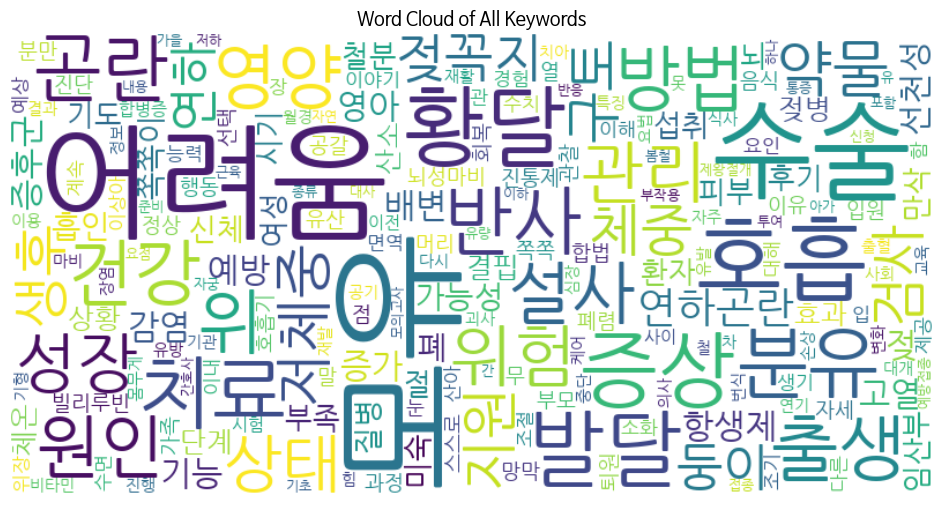

    Keyword  Frequency
0        모유       1209
1       어려움        991
2        수술        691
3        호흡        498
4        황달        451
..      ...        ...
195      가을         46
196      봄철         46
197      근육         45
198     간호사         45
199      준비         45

[200 rows x 2 columns]
상위 50개 키워드 데이터가 'top_50_keywords.csv(naverblog)'로 저장되었습니다.


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유","삼킴","연하 곤란","장애", "문제", "빨기", "수유", "구강","빠는 힘"]

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘','기','달',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가',
    '계','달','수도','주','비'
]

remove_words = [
    '미만','해결','이후','간호','임신','경우','소아','태아','생리','가장','주의','낙태','구멍','간호조무사','쌍둥이','사항','확인',
    '의료','비교','미숙아','문제','아동','신생아','아기','출산','아이','간호학','발생','엄마','정리','이상','때문','산모','보통',
    '조산','시간','임신중절','중절','지연','병원','사용','육아','법','초기','유아','기간','봄','권장','시작','약','지속','일반','공급',
    '산후조리원','도움','유지','배','감소','산후','기준','비용','운동','영향','라면','질환'
    ]

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/naver_blog/pre_blog'  # 실제 경로에 맞게 수정

# 폴더 내 파일 목록 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [
            word for word in tokens
            if word not in stop_words and word not in remove_words and word not in essential_keywords
        ]
        all_keywords.extend(filtered_tokens)

# 상위 50개 키워드 추출
word_counts = Counter(all_keywords)
top_50_keywords = word_counts.most_common(200)

# 데이터프레임 생성
top_50_keywords_df = pd.DataFrame(top_50_keywords, columns=['Keyword', 'Frequency'])

# 워드 클라우드 생성
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 상위 50개 키워드 출력
print(top_50_keywords_df)

# CSV 파일로 저장
top_50_keywords_df.to_csv("top_50_keywords(naverblog).csv", index=False, encoding='utf-8-sig')
print("상위 50개 키워드 데이터가 'top_50_keywords.csv(naverblog)'로 저장되었습니다.")
